In [9]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from JPEGFUNC import *

In [190]:
# from scipy.fftpack import dct, idct

# def dct2(a):
#     return dct( dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

# def idct2(a):
#     return idct( idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

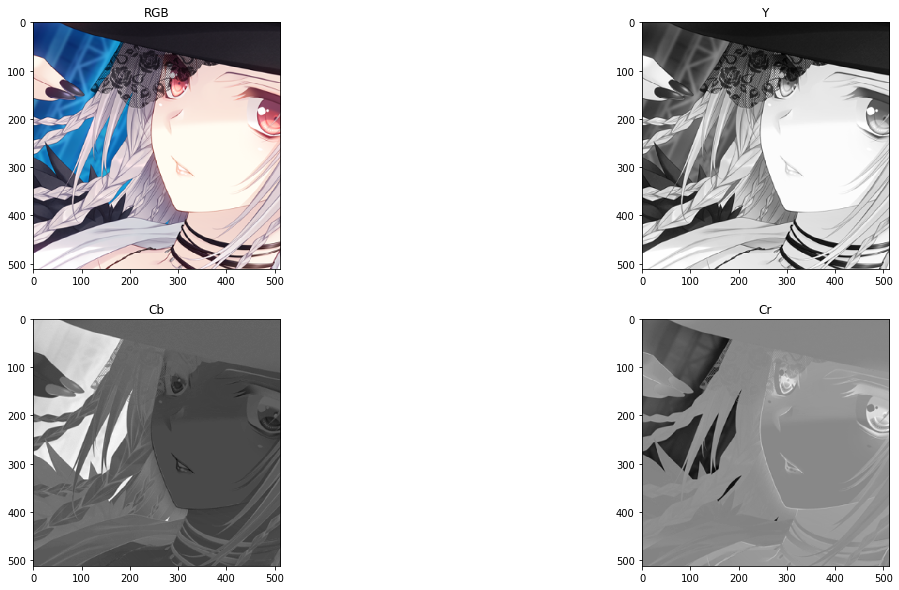

In [48]:
# Read img and transfer RGB to YCbCr
ori=Image.open("Saika.png")
arrayOri=np.array(ori)[:,:,:3]
arrayOri=arrayOri[200:200+512,600:600+512].copy()
cbcr=ycc(arrayOri)

fig=plt.figure(figsize=(20,10))
ax = fig.subplots(2, 2)

ax[0,0].imshow(arrayOri)
ax[0,1].imshow(cbcr[:,:,0],"gray")
ax[1,0].imshow(cbcr[:,:,1],"gray")
ax[1,1].imshow(cbcr[:,:,2],"gray")
# ax[1,1].imshow(_rgb(cbcr[:,:,2]),cmap="gray")

ax[0,0].set_title("RGB")
ax[0,1].set_title("Y")
ax[1,0].set_title("Cb")
ax[1,1].set_title("Cr")

plt.show()

In [185]:
jpg=arrayOri.copy()
for fig1,nx,ny in cutTo8(cbcr):
    # DCT
    Gy, Gcb, Gcr=map(dct02,(fig1[:,:,0],fig1[:,:,1],fig1[:,:,2]))
    # Quantization
    By, Bcb, Bcr=Qy(Gy), Qc(Gcb), Qc(Gcr)
    # iQuantization
    iGy, iGcb, iGcr=iQy(By), iQc(Bcb), iQc(Bcr)
    # iDCT
    iY, iCb, iCr=map(idct02, (iGy, iGcb, iGcr))
    # iRGB
    jpg[nx:nx+8,ny:ny+8]=rgb(np.stack([iY, iCb, iCr],2))

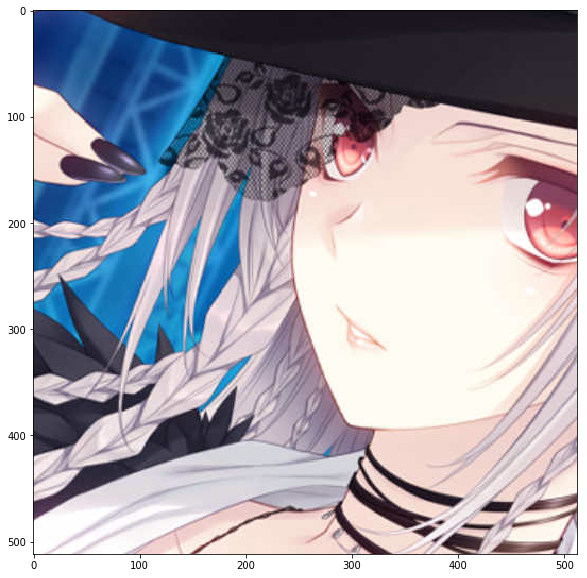

In [189]:
# plt.imsave('JPG0.png', arrayOri)
# plt.close()
plt.figure(figsize=(10,10))
plt.imshow(jpg)
# plt.imsave('iJPG0.jpg', jpg)

In [13]:
Zs=Bs[Zigzag(8)]

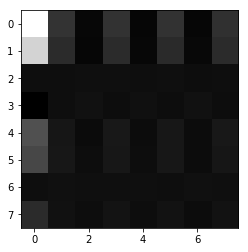

In [24]:
# log_shift_dct_img=np.log(1+np.abs(dct2(fig1[:,:,0])))
# dct_img=np.log(1+np.abs(dct2(fig1[:,:,0])))
# plt.imshow(dct_img, 'gray')
Gy=
plt.imshow(dct2(fig1[:,:,0]).real, 'gray')
# plt.imshow(np.abs(dct2(cbcr[:512,:512,0])[:10,:10]), 'gray')